# COVID-19 in India

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
#read data 

covid1 = pd.read_csv("/Users/aishwarya/Documents/Work/Projects/COVID19_India_analysis/data/covid_19_india.csv")

In [4]:
covid1.shape

(18110, 9)

In [5]:
covid1.head()

Sno        Date     Time State/UnionTerritory  ConfirmedIndianNational  \
0    1  30/01/2020  6:00 PM               Kerala                      1.0   
1    2  31/01/2020  6:00 PM               Kerala                      1.0   
2    3  01/02/2020  6:00 PM               Kerala                      2.0   
3    4  02/02/2020  6:00 PM               Kerala                      3.0   
4    5  03/02/2020  6:00 PM               Kerala                      3.0   

   ConfirmedForeignNational  Cured  Deaths  Confirmed  
0                       0.0      0       0          1  
1                       0.0      0       0          1  
2                       0.0      0       0          2  
3                       0.0      0       0          3  
4                       0.0      0       0          3

In [6]:
covid1.columns

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

In [7]:
covid1.isnull().sum()

Sno                             0
Date                            0
Time                            0
State/UnionTerritory            0
ConfirmedIndianNational     17664
ConfirmedForeignNational    17664
Cured                           0
Deaths                          0
Confirmed                       0
dtype: int64

In [8]:
covid1.dtypes

Sno                           int64
Date                         object
Time                         object
State/UnionTerritory         object
ConfirmedIndianNational     float64
ConfirmedForeignNational    float64
Cured                         int64
Deaths                        int64
Confirmed                     int64
dtype: object

In [9]:
covid1 = covid1.drop(['ConfirmedIndianNational', 'ConfirmedForeignNational'], axis=1)
covid1.shape

(18110, 7)

In [10]:
covid1.head()

Sno        Date     Time State/UnionTerritory  Cured  Deaths  Confirmed
0    1  30/01/2020  6:00 PM               Kerala      0       0          1
1    2  31/01/2020  6:00 PM               Kerala      0       0          1
2    3  01/02/2020  6:00 PM               Kerala      0       0          2
3    4  02/02/2020  6:00 PM               Kerala      0       0          3
4    5  03/02/2020  6:00 PM               Kerala      0       0          3

In [11]:
covid1["Date"]=pd.to_datetime(covid1['Date'])

In [12]:
covid1.dtypes

Sno                              int64
Date                    datetime64[ns]
Time                            object
State/UnionTerritory            object
Cured                            int64
Deaths                           int64
Confirmed                        int64
dtype: object

In [13]:
covid1["month"] = covid1["Date"].dt.month

In [14]:
covid1["year"] = covid1["Date"].dt.year

In [15]:
covid1.head()

Sno       Date     Time State/UnionTerritory  Cured  Deaths  Confirmed  \
0    1 2020-01-30  6:00 PM               Kerala      0       0          1   
1    2 2020-01-31  6:00 PM               Kerala      0       0          1   
2    3 2020-01-02  6:00 PM               Kerala      0       0          2   
3    4 2020-02-02  6:00 PM               Kerala      0       0          3   
4    5 2020-03-02  6:00 PM               Kerala      0       0          3   

   month  year  
0      1  2020  
1      1  2020  
2      1  2020  
3      2  2020  
4      3  2020

In [ ]:
### Subsetting Karnataka

In [17]:
covid_kar = covid1[covid1['State/UnionTerritory']== "Karnataka"]

In [18]:
covid_kar1 = covid_kar.copy() 

In [19]:
covid_kar1['Cured_Daily'] = covid_kar1['Cured'].diff().fillna(covid_kar1['Cured'])
covid_kar1['Deaths_Daily'] = covid_kar1['Deaths'].diff().fillna(covid_kar1['Deaths'])
covid_kar1['Confirmed_Daily'] = covid_kar1['Confirmed'].diff().fillna(covid_kar1['Confirmed'])

In [20]:
covid_kar1['yr_mth'] = covid_kar1['year'].map(str)+ "_" + covid_kar1['month'].map(str)
covid_kar1.head()

Sno       Date     Time State/UnionTerritory  Cured  Deaths  Confirmed  \
74    75 2020-09-03  6:00 PM            Karnataka      0       0          1   
89    90 2020-10-03  6:00 PM            Karnataka      0       0          4   
108  109 2020-11-03  6:00 PM            Karnataka      0       0          4   
119  120 2020-12-03  6:00 PM            Karnataka      0       0          4   
132  133 2020-03-13  6:00 PM            Karnataka      0       1          6   

     month  year  Cured_Daily  Deaths_Daily  Confirmed_Daily   yr_mth  
74       9  2020          0.0           0.0              1.0   2020_9  
89      10  2020          0.0           0.0              3.0  2020_10  
108     11  2020          0.0           0.0              0.0  2020_11  
119     12  2020          0.0           0.0              0.0  2020_12  
132      3  2020          0.0           1.0              2.0   2020_3

In [21]:
covid_kar1.head()

Sno       Date     Time State/UnionTerritory  Cured  Deaths  Confirmed  \
74    75 2020-09-03  6:00 PM            Karnataka      0       0          1   
89    90 2020-10-03  6:00 PM            Karnataka      0       0          4   
108  109 2020-11-03  6:00 PM            Karnataka      0       0          4   
119  120 2020-12-03  6:00 PM            Karnataka      0       0          4   
132  133 2020-03-13  6:00 PM            Karnataka      0       1          6   

     month  year  Cured_Daily  Deaths_Daily  Confirmed_Daily   yr_mth  
74       9  2020          0.0           0.0              1.0   2020_9  
89      10  2020          0.0           0.0              3.0  2020_10  
108     11  2020          0.0           0.0              0.0  2020_11  
119     12  2020          0.0           0.0              0.0  2020_12  
132      3  2020          0.0           1.0              2.0   2020_3

In [59]:
covid_kar1_gp = covid_kar1.groupby("yr_mth",  as_index=False).sum()
covid_kar1_gp.head(2)

yr_mth     Sno     Cured  Deaths  Confirmed  month   year  Cured_Daily  \
0   2020_1   42513   2400931   40148    2795754      9  18180      29370.0   
1  2020_10  189640  15439683  246024   17851817    290  58580     197265.0   

   Deaths_Daily  Confirmed_Daily  
0         349.0          26129.0  
1        1581.0         142218.0

In [57]:
covid_kar1_gp= covid_kar1_gp.drop(["Sno", "Cured", "Deaths", "Confirmed", "month","year"], axis=1)

In [58]:
covid_kar1_gp

yr_mth  Cured_Daily  Deaths_Daily  Confirmed_Daily
0    2020_1      29370.0         349.0          26129.0
1   2020_10     197265.0        1581.0         142218.0
2   2020_11      67204.0         750.0          60208.0
3   2020_12      61173.0         556.0          51599.0
4    2020_2      25374.0         409.0          30763.0
5    2020_3      27158.0         392.0          30201.0
6    2020_4      29712.0         379.0          30037.0
7    2020_5      30268.0         406.0          34497.0
8    2020_6      34090.0         547.0          37406.0
9    2020_7      61969.0        1972.0         115081.0
10   2020_8     162893.0        2597.0         175712.0
11   2020_9     168358.0        2143.0         184693.0
12   2021_1      91450.0         889.0          87299.0
13  2021_10      61834.0         832.0          84542.0
14  2021_11      57000.0         910.0          62009.0
15  2021_12      43989.0         752.0          61673.0
16   2021_2      73811.0         961.0          72893.0
17   2021_3      79126.0         974.0         100945.0
18   2021_4     184480.0        3326.0         482211.0
19   2021_5     869076.0        9592.0         644864.0
20   2021_6     271973.0        3135.0         168635.0
21   2021_7     101369.0        1519.0         106060.0
22   2021_8      65093.0        1087.0          73938.0
23   2021_9      67464.0         790.0          57436.0

In [60]:
covid_kar1_gp.to_csv("covid_kar1_gp.csv")

### Let's see the trend  in Karnataka

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import matplotlib

#### Positive cases, Cured cases and Deaths - Karnataka - Monthwise

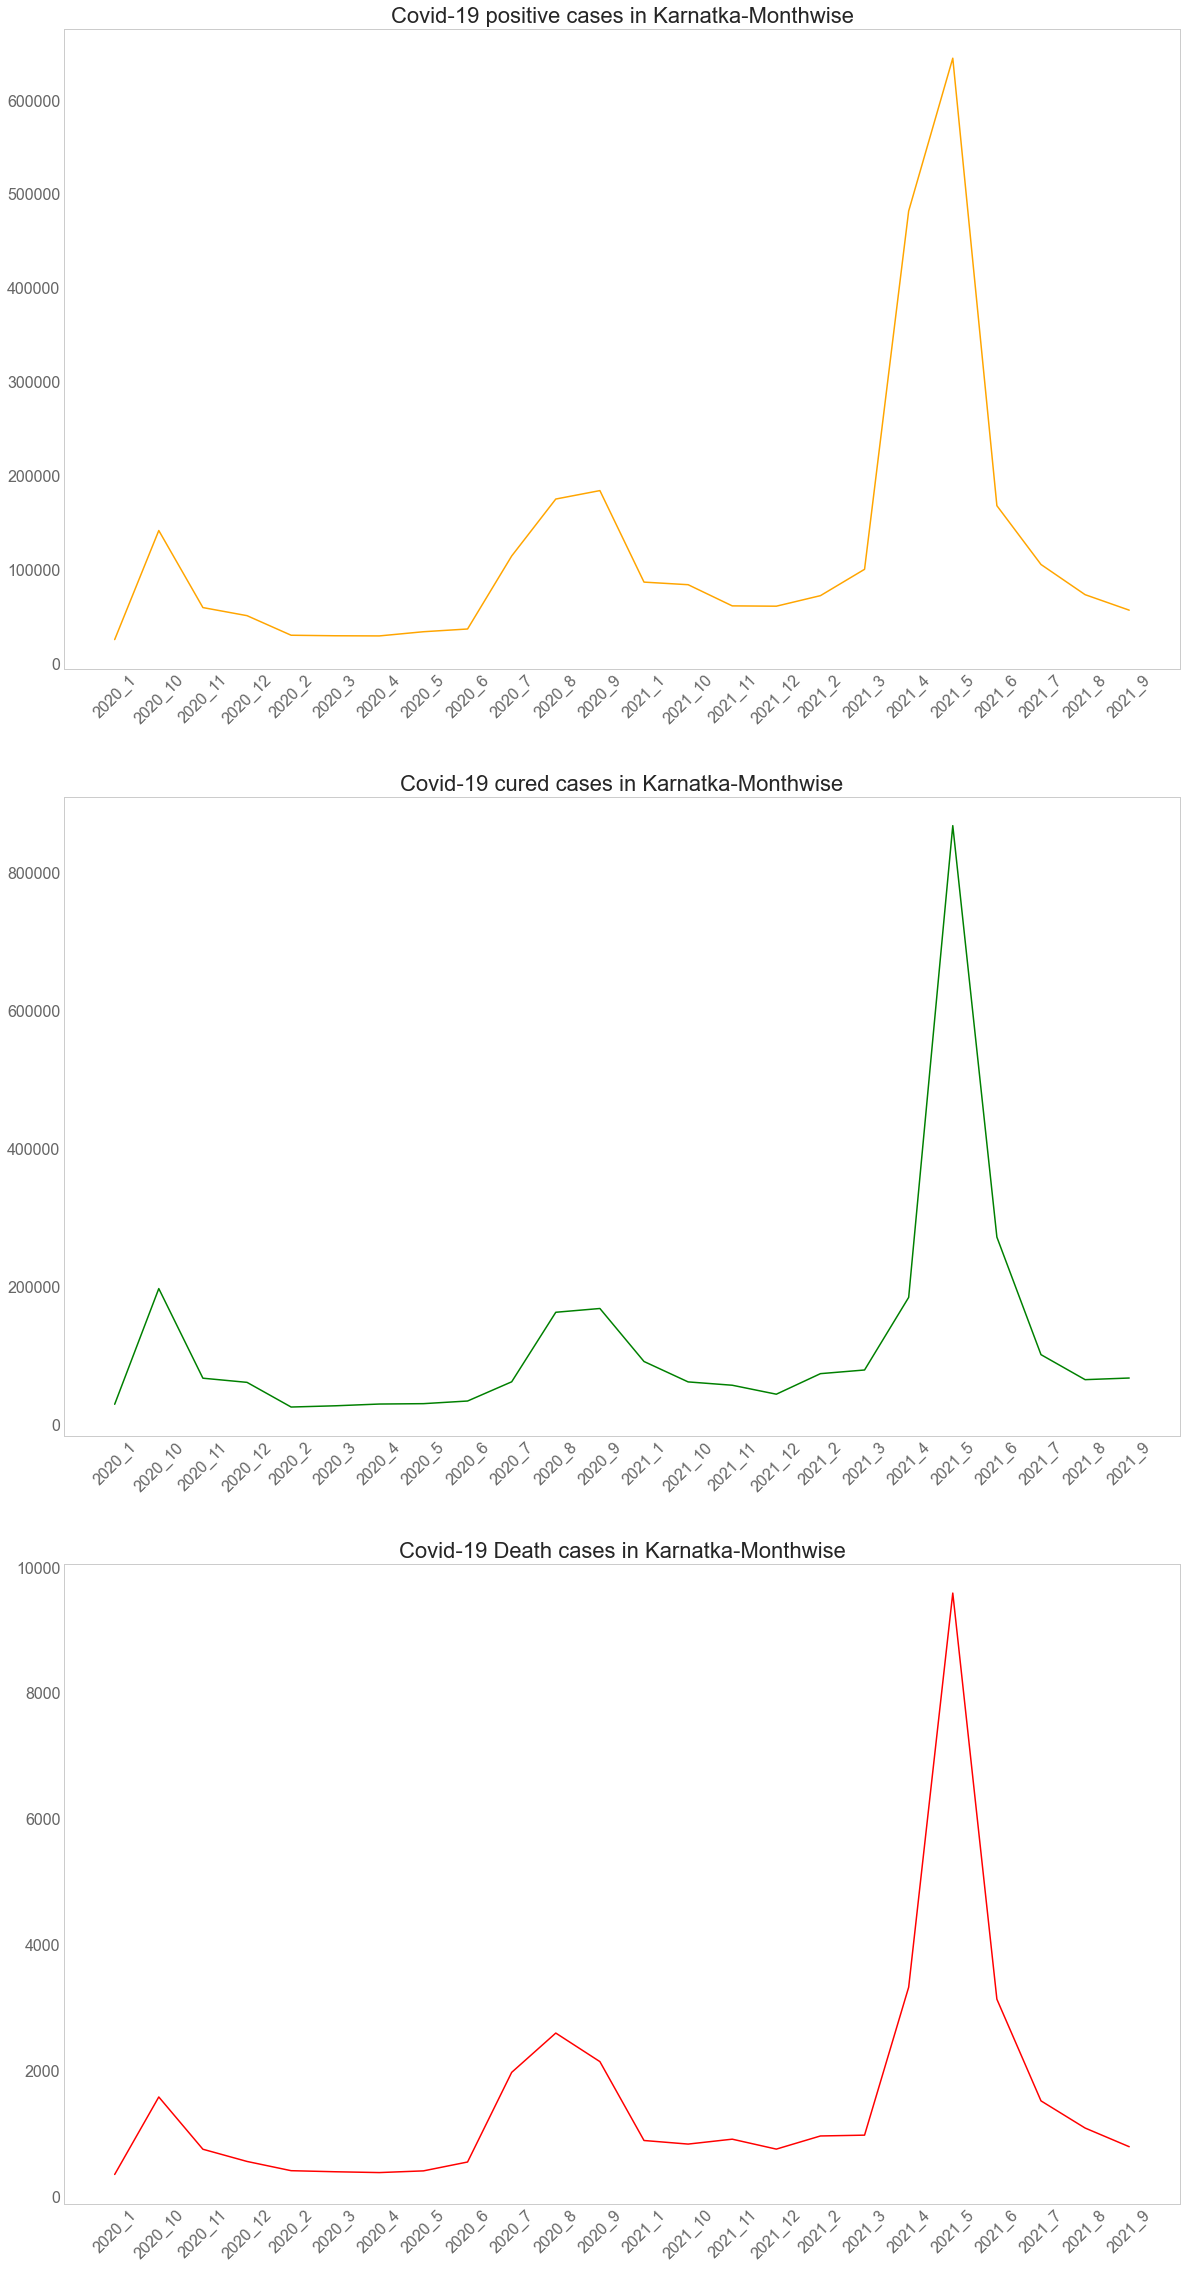

In [25]:
fig = plt.figure(figsize=(20,40))
ax = plt.axes()

# Remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)   

x = covid_kar1_gp["yr_mth"]
y = covid_kar1_gp["Confirmed_Daily"]
plt.subplot(311)
plt.plot(x, y,color='orange')
#Decoration
plt.xticks(fontsize=16, rotation=45, alpha=.7)
plt.yticks(fontsize=16, alpha=.7)
plt.title("Covid-19 positive cases in Karnatka-Monthwise", fontsize=22)
plt.grid(axis='both', alpha=.3)




x = covid_kar1_gp["yr_mth"]
y1 = covid_kar1_gp["Cured_Daily"]
plt.subplot(312)
plt.plot(x, y1,color='green')
#Decoration
plt.xticks(fontsize=16, rotation=45, alpha=.7)
plt.yticks(fontsize=16, alpha=.7)
plt.title("Covid-19 cured cases in Karnatka-Monthwise", fontsize=22)
plt.grid(axis='both', alpha=.3)


x = covid_kar1_gp["yr_mth"]
y2 = covid_kar1_gp["Deaths_Daily"]
plt.subplot(313)
plt.plot(x, y2,color='red')
#Decoration
plt.xticks(fontsize=16, rotation=45, alpha=.7)
plt.yticks(fontsize=16, alpha=.7)
plt.title("Covid-19 Death cases in Karnatka-Monthwise", fontsize=22)
plt.grid(axis='both', alpha=.3)


plt.show() 

#### All trends in Karnataka - Monthwise 

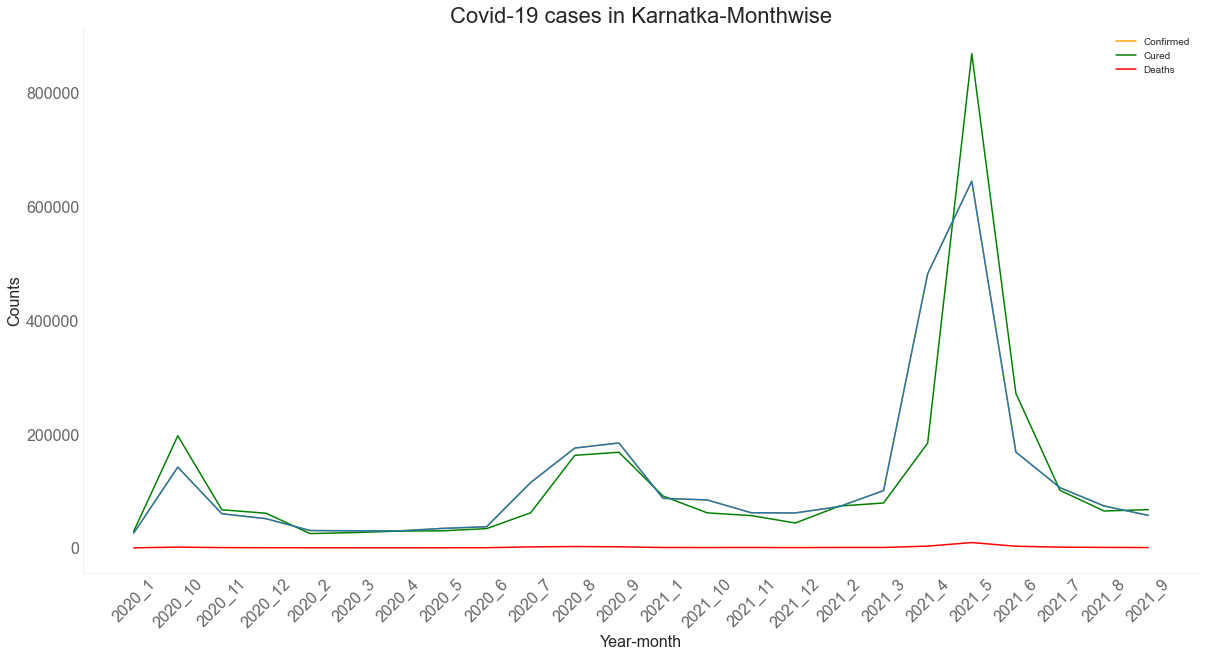

In [26]:
fig = plt.figure(figsize=(20,10))
ax = plt.axes()

# Remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 


x = covid_kar1_gp["yr_mth"]
y = covid_kar1_gp["Confirmed_Daily"]
y1 = covid_kar1_gp["Cured_Daily"]
y2 = covid_kar1_gp["Deaths_Daily"]

plt.plot(x, y,color='orange')
plt.plot(x, y1,color='green')
plt.plot(x, y2,color='red')
plt.gca().legend(('Confirmed','Cured', 'Deaths'))  

#Decoration
plt.xticks(fontsize=16, rotation=45, alpha=.7)
plt.yticks(fontsize=16, alpha=.7)
plt.title("Covid-19 cases in Karnatka-Monthwise", fontsize=22)
plt.grid(axis='both', alpha=.3)

plt.plot(x, y)
plt.xlabel("Year-month", fontsize= "16")
plt.ylabel("Counts",  fontsize= "16")
plt.show() 

In [38]:
confiremed_2021_5= int(covid_kar1_gp["Confirmed_Daily"][covid_kar1_gp["yr_mth"]== '2021_5'])
confiremed_2021_3= int(covid_kar1_gp["Confirmed_Daily"][covid_kar1_gp["yr_mth"]== '2021_3'])

In [66]:
confiremed_2021_5

644864

In [40]:
(confiremed_2021_5 - confiremed_2021_3)/confiremed_2021_3 *100

538.8270840556739

Karnataka saw the highest peak in cases of all time in May 2021, during the second wave.
A total of 6,44,864 positive cases were reported in May 2021. 

There is a 500% rise in cases within 2 months from March to May in 2021 - Second wave

### Getting daily cases for all states 

In [41]:
covid1.head()

Sno       Date     Time State/UnionTerritory  Cured  Deaths  Confirmed  \
0    1 2020-01-30  6:00 PM               Kerala      0       0          1   
1    2 2020-01-31  6:00 PM               Kerala      0       0          1   
2    3 2020-01-02  6:00 PM               Kerala      0       0          2   
3    4 2020-02-02  6:00 PM               Kerala      0       0          3   
4    5 2020-03-02  6:00 PM               Kerala      0       0          3   

   month  year  
0      1  2020  
1      1  2020  
2      1  2020  
3      2  2020  
4      3  2020

In [43]:
covid2= covid1.drop(["Sno", "Time"], axis=1)
covid2.head()

Date State/UnionTerritory  Cured  Deaths  Confirmed  month  year
0 2020-01-30               Kerala      0       0          1      1  2020
1 2020-01-31               Kerala      0       0          1      1  2020
2 2020-01-02               Kerala      0       0          2      1  2020
3 2020-02-02               Kerala      0       0          3      2  2020
4 2020-03-02               Kerala      0       0          3      3  2020

In [44]:
covid2['yr_mth'] = covid2['year'].map(str)+ "_" + covid2['month'].map(str)
covid2.head()

Date State/UnionTerritory  Cured  Deaths  Confirmed  month  year  \
0 2020-01-30               Kerala      0       0          1      1  2020   
1 2020-01-31               Kerala      0       0          1      1  2020   
2 2020-01-02               Kerala      0       0          2      1  2020   
3 2020-02-02               Kerala      0       0          3      2  2020   
4 2020-03-02               Kerala      0       0          3      3  2020   

   yr_mth  
0  2020_1  
1  2020_1  
2  2020_1  
3  2020_2  
4  2020_3

In [47]:
states = covid2["State/UnionTerritory"].unique()
states

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Lakshadweep', 'Telangana', 'Dadra and Nagar Haveli', 'Bihar****',
       'Madhya Pradesh***', 'Himanchal Pradesh', 'Karanataka',
       'Maharashtra***'], dtype=object)

In [50]:
covid_all_st_daily = pd.DataFrame()

for state in states:
    covid_st = covid2[covid2['State/UnionTerritory']== state]
    
    covid_st['Cured_Daily'] = covid_st['Cured'].diff().fillna(covid_st['Cured'])
    covid_st['Deaths_Daily'] = covid_st['Deaths'].diff().fillna(covid_st['Deaths'])
    covid_st['Confirmed_Daily'] = covid_st['Confirmed'].diff().fillna(covid_st['Confirmed'])
    
    covid_all_st_daily= covid_all_st_daily.append(covid_st)
   

<ipython-input-50-0185757b8b05>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_st['Cured_Daily'] = covid_st['Cured'].diff().fillna(covid_st['Cured'])
<ipython-input-50-0185757b8b05>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_st['Deaths_Daily'] = covid_st['Deaths'].diff().fillna(covid_st['Deaths'])
<ipython-input-50-0185757b8b05>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [54]:
covid_all_st_daily[covid_all_st_daily['State/UnionTerritory']== "Himachal Pradesh"]

Date State/UnionTerritory   Cured  Deaths  Confirmed  month  year  \
253   2020-03-21     Himachal Pradesh       0       0          2      3  2020   
276   2020-03-22     Himachal Pradesh       0       0          2      3  2020   
299   2020-03-23     Himachal Pradesh       0       0          2      3  2020   
322   2020-03-24     Himachal Pradesh       0       1          3      3  2020   
346   2020-03-25     Himachal Pradesh       0       1          3      3  2020   
...          ...                  ...     ...     ...        ...    ...   ...   
17942 2021-07-08     Himachal Pradesh  202084    3533     207344      7  2021   
17978 2021-08-08     Himachal Pradesh  202218    3533     207700      8  2021   
18014 2021-09-08     Himachal Pradesh  202391    3534     207887      9  2021   
18050 2021-10-08     Himachal Pradesh  202576    3535     208197     10  2021   
18086 2021-11-08     Himachal Pradesh  202761    3537     208616     11  2021   

        yr_mth  Cured_Daily  Deaths_Daily  Confirmed_Daily  
253     2020_3          0.0           0.0              2.0  
276     2020_3          0.0           0.0              0.0  
299     2020_3          0.0           0.0              0.0  
322     2020_3          0.0           1.0              1.0  
346     2020_3          0.0           0.0              0.0  
...        ...          ...           ...              ...  
17942   2021_7        137.0           2.0            256.0  
17978   2021_8        134.0           0.0            356.0  
18014   2021_9        173.0           1.0            187.0  
18050  2021_10        185.0           1.0            310.0  
18086  2021_11        185.0           2.0            419.0  

[508 rows x 11 columns]

In [61]:
covid_allst_mthwise = covid_all_st_daily.groupby("yr_mth",  as_index=False).sum()
covid_allst_mthwise

yr_mth      Cured   Deaths  Confirmed  month     year  Cured_Daily  \
0    2020_1   26037562   484196   30159470    312   630240     306399.0   
1   2020_10  159181179  2736174  179238749   9890  1997780    1604332.0   
2   2020_11  181976281  2924686  196850474  10516  1931120    1104122.0   
3   2020_12  212378879  3311641  225195656  12120  2040200     858417.0   
4    2020_2   26342554   488902   30485672    658   664580     304992.0   
5    2020_3   26652921   493696   30818344   2166  1458440     309710.0   
6    2020_4   27031702   509867   31504870   3600  1818000     316170.0   
7    2020_5   28230704   572572   33795041   4845  1957380     382580.0   
8    2020_6   31849082   746144   39457789   5790  1949300     500331.0   
9    2020_7   42653854  1067029   55350453   6937  2001820     839602.0   
10   2020_8   70493257  1576520   89165495   7880  1989700    1451777.0   
11   2020_9  108486220  2111081  132000768   8586  1927080    1881848.0   
12   2021_1  339824761  4897745  355632749    972  1964412    1054661.0   
13  2021_10  150989684  2074369  160416858   2880   582048    1423789.0   
14  2021_11  151681192  2084148  161096647   3168   582048     691508.0   
15  2021_12  121103938  1665184  129747529   3024   509292     643727.0   
16   2021_2  316226264  4500300  330325452   1728  1746144    1282919.0   
17   2021_3  358220874  5051689  377155092   2916  1964412    1197223.0   
18   2021_4  390276605  5363305  443039997   3744  1891656    3965721.0   
19   2021_5  582766089  7627389  653256980   4860  1964412    7041721.0   
20   2021_6  667024670  9010186  696288229   5616  1891656    2227646.0   
21   2021_7  726907939  9977682  752074885   6804  1964412   11268530.0   
22   2021_8  149522112  2052834  158942744   2304   582048     695071.0   
23   2021_9  150267129  2061666  159678744   2592   582048     745017.0   

    Deaths_Daily  Confirmed_Daily  
0         4536.0         321105.0  
1        17375.0        1357922.0  
2        13951.0        1088082.0  
3        11018.0         787206.0  
4         4706.0         326153.0  
5         4627.0         324735.0  
6         5493.0         354362.0  
7         8024.0         450715.0  
8        13258.0         598655.0  
9        17785.0        1134501.0  
10       23175.0        1616333.0  
11       24790.0        1907147.0  
12       11750.0        1008831.0  
13       18161.0        1452704.0  
14        9779.0         679789.0  
15       14209.0         688533.0  
16       12965.0        1390576.0  
17       12882.0        1563158.0  
18       46757.0        5971849.0  
19       84231.0        5441397.0  
20       39960.0        1754917.0  
21      204928.0       11614660.0  
22        8718.0         747896.0  
23        8832.0         736000.0

In [63]:
covid_allst_mthwise= covid_allst_mthwise.drop([ "Cured", "Deaths", "Confirmed", "month","year"], axis=1)

In [64]:
covid_allst_mthwise

yr_mth  Cured_Daily  Deaths_Daily  Confirmed_Daily
0    2020_1     306399.0        4536.0         321105.0
1   2020_10    1604332.0       17375.0        1357922.0
2   2020_11    1104122.0       13951.0        1088082.0
3   2020_12     858417.0       11018.0         787206.0
4    2020_2     304992.0        4706.0         326153.0
5    2020_3     309710.0        4627.0         324735.0
6    2020_4     316170.0        5493.0         354362.0
7    2020_5     382580.0        8024.0         450715.0
8    2020_6     500331.0       13258.0         598655.0
9    2020_7     839602.0       17785.0        1134501.0
10   2020_8    1451777.0       23175.0        1616333.0
11   2020_9    1881848.0       24790.0        1907147.0
12   2021_1    1054661.0       11750.0        1008831.0
13  2021_10    1423789.0       18161.0        1452704.0
14  2021_11     691508.0        9779.0         679789.0
15  2021_12     643727.0       14209.0         688533.0
16   2021_2    1282919.0       12965.0        1390576.0
17   2021_3    1197223.0       12882.0        1563158.0
18   2021_4    3965721.0       46757.0        5971849.0
19   2021_5    7041721.0       84231.0        5441397.0
20   2021_6    2227646.0       39960.0        1754917.0
21   2021_7   11268530.0      204928.0       11614660.0
22   2021_8     695071.0        8718.0         747896.0
23   2021_9     745017.0        8832.0         736000.0

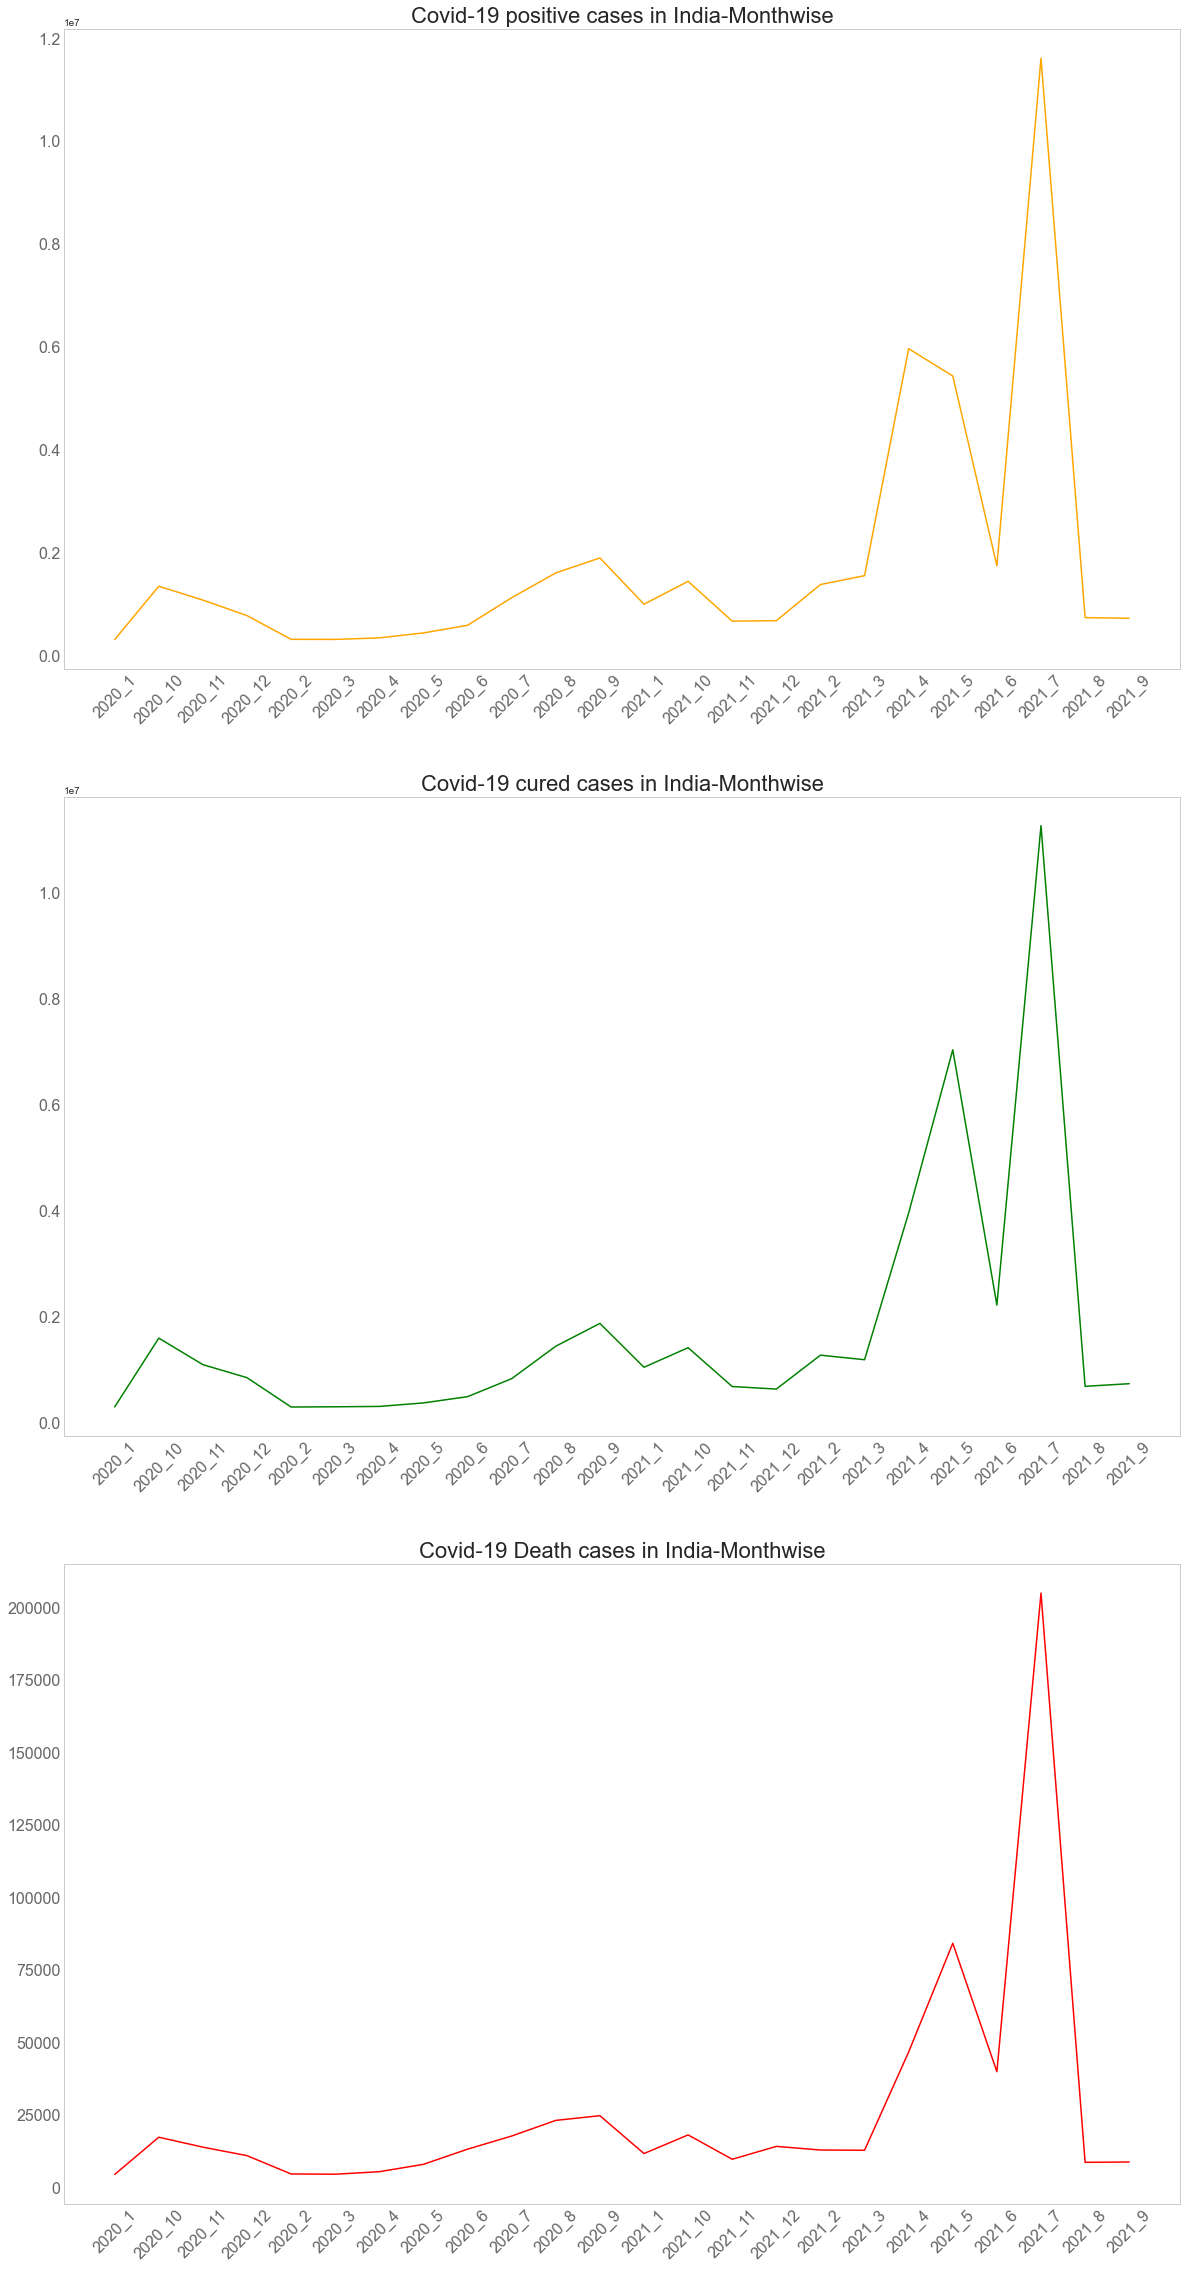

In [65]:
fig = plt.figure(figsize=(20,40))
ax = plt.axes()

# Remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)   

x = covid_allst_mthwise["yr_mth"]
y = covid_allst_mthwise["Confirmed_Daily"]
plt.subplot(311)
plt.plot(x, y,color='orange')
#Decoration
plt.xticks(fontsize=16, rotation=45, alpha=.7)
plt.yticks(fontsize=16, alpha=.7)
plt.title("Covid-19 positive cases in India-Monthwise", fontsize=22)
plt.grid(axis='both', alpha=.3)




x = covid_allst_mthwise["yr_mth"]
y1 = covid_allst_mthwise["Cured_Daily"]
plt.subplot(312)
plt.plot(x, y1,color='green')
#Decoration
plt.xticks(fontsize=16, rotation=45, alpha=.7)
plt.yticks(fontsize=16, alpha=.7)
plt.title("Covid-19 cured cases in India-Monthwise", fontsize=22)
plt.grid(axis='both', alpha=.3)


x = covid_allst_mthwise["yr_mth"]
y2 = covid_allst_mthwise["Deaths_Daily"]
plt.subplot(313)
plt.plot(x, y2,color='red')
#Decoration
plt.xticks(fontsize=16, rotation=45, alpha=.7)
plt.yticks(fontsize=16, alpha=.7)
plt.title("Covid-19 Death cases in India-Monthwise", fontsize=22)
plt.grid(axis='both', alpha=.3)


plt.show() 

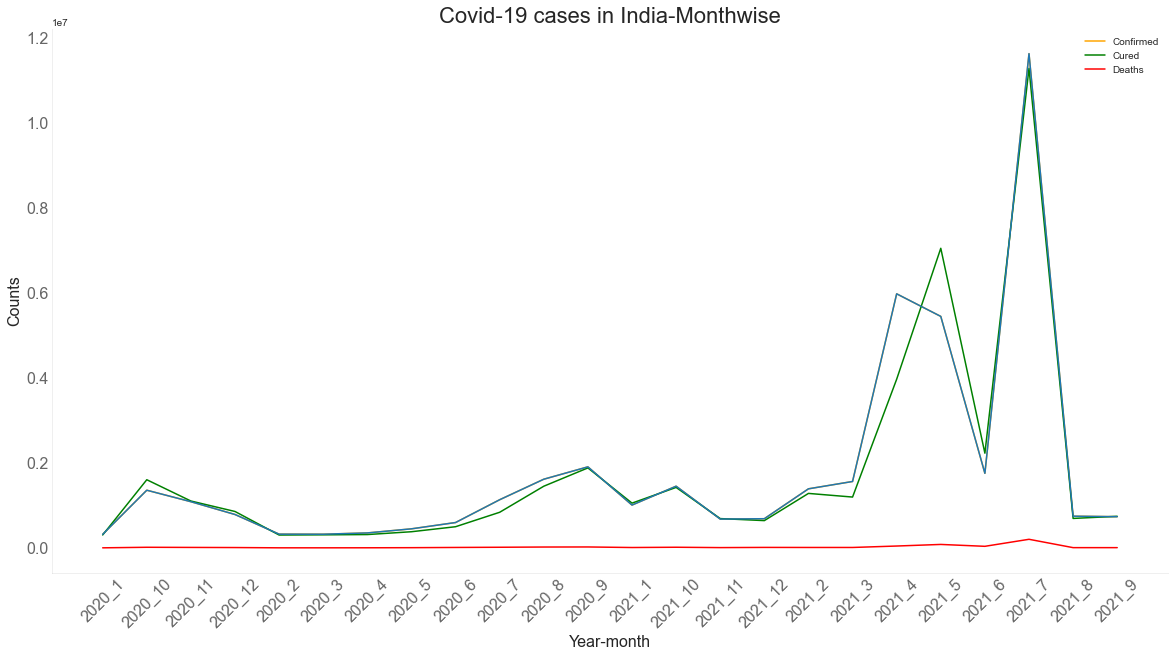

In [67]:
fig = plt.figure(figsize=(20,10))
ax = plt.axes()

# Remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 


x = covid_allst_mthwise["yr_mth"]
y = covid_allst_mthwise["Confirmed_Daily"]
y1 = covid_allst_mthwise["Cured_Daily"]
y2 = covid_allst_mthwise["Deaths_Daily"]

plt.plot(x, y,color='orange')
plt.plot(x, y1,color='green')
plt.plot(x, y2,color='red')
plt.gca().legend(('Confirmed','Cured', 'Deaths'))  

#Decoration
plt.xticks(fontsize=16, rotation=45, alpha=.7)
plt.yticks(fontsize=16, alpha=.7)
plt.title("Covid-19 cases in India-Monthwise", fontsize=22)
plt.grid(axis='both', alpha=.3)

plt.plot(x, y)
plt.xlabel("Year-month", fontsize= "16")
plt.ylabel("Counts",  fontsize= "16")
plt.show() 

In [70]:
confiremed_2021_7= int(covid_allst_mthwise["Confirmed_Daily"][covid_allst_mthwise["yr_mth"]== '2021_7'])
confiremed_2021_5= int(covid_allst_mthwise["Confirmed_Daily"][covid_allst_mthwise["yr_mth"]== '2021_5'])
confiremed_2021_6= int(covid_allst_mthwise["Confirmed_Daily"][covid_allst_mthwise["yr_mth"]== '2021_6'])

In [71]:
(confiremed_2021_7 - confiremed_2021_6)/confiremed_2021_6 *100

561.8352890763495

In [72]:
confiremed_2021_7

11614660

In [69]:
(confiremed_2021_7 - confiremed_2021_5)/confiremed_2021_5 *100

113.449965146818

India saw it's highest peak of cases in July 2021 - 1,16,14,660 cases 

Within June and July there is a 560% rise in positive cases. Between May and july there is a 113% rise in positive cases 

